In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from extreme_classification.distributions import multivariate_logistic_distribution
import seaborn as sns
import matplotlib.pyplot as plt

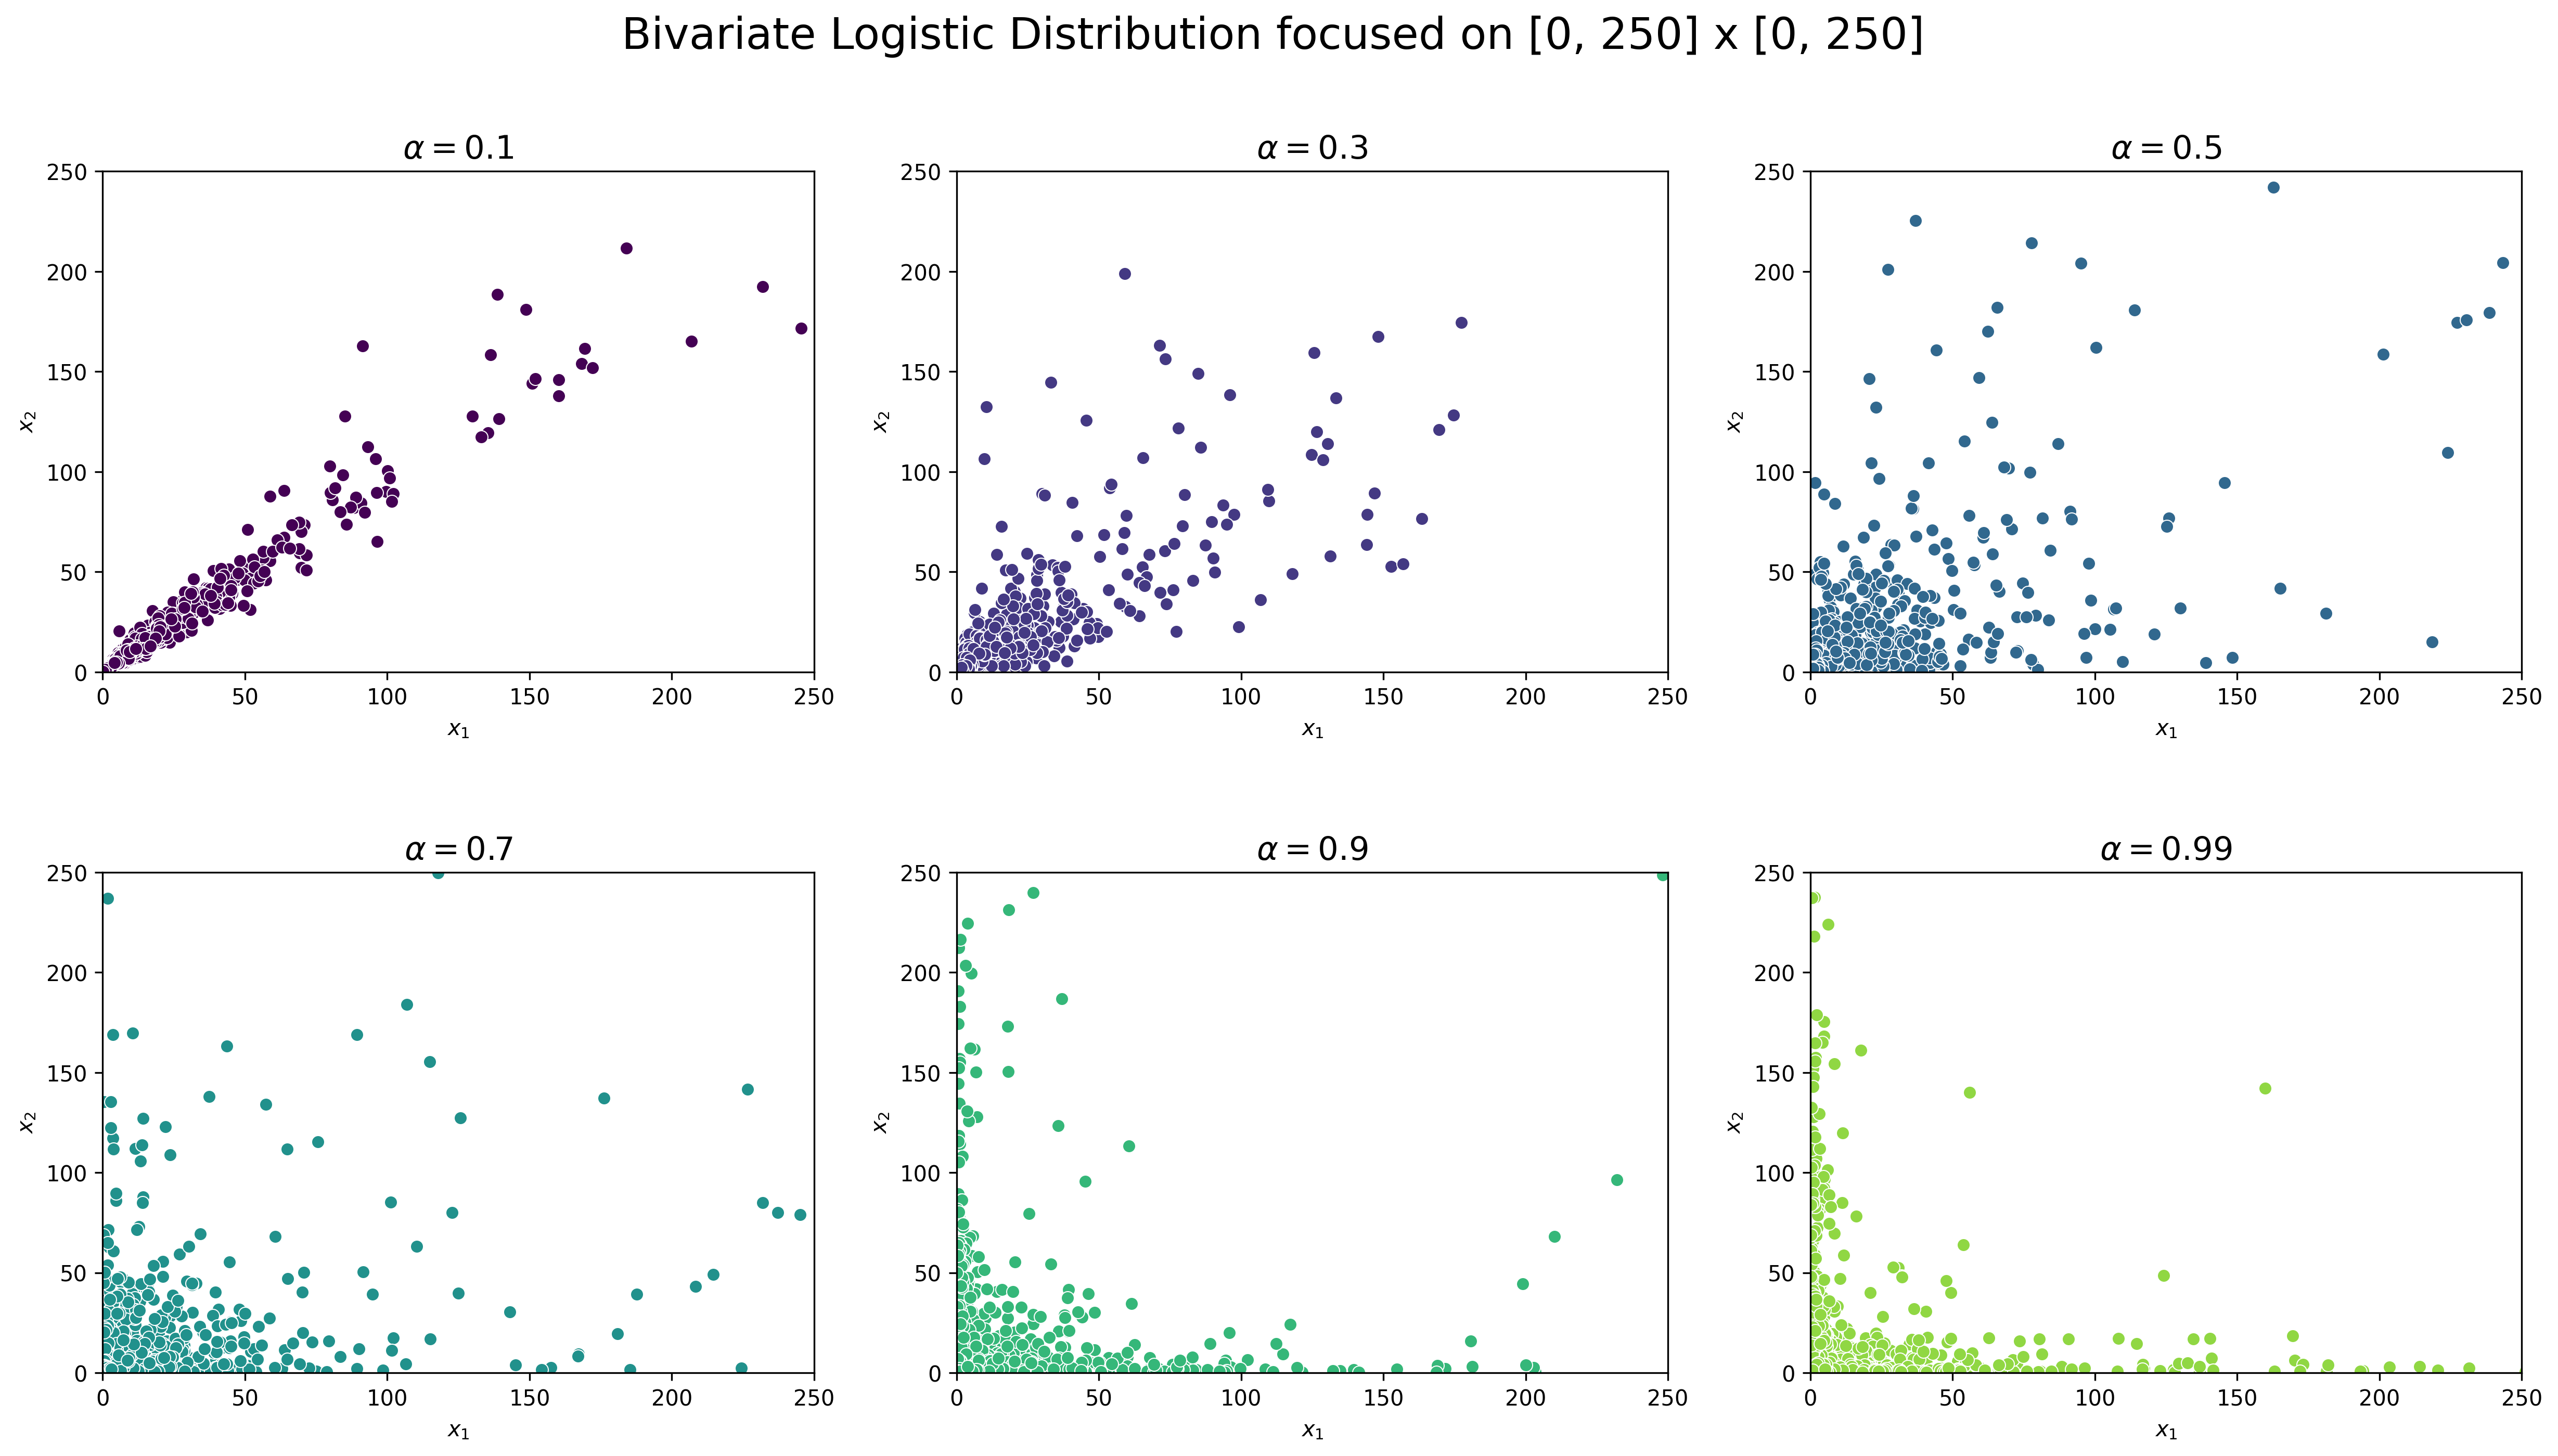

In [35]:
n_samples = 5000
dim = 2
alphas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]

plt.figure(figsize=(20, 10), dpi=300)
plt.suptitle("Bivariate Logistic Distribution focused on [0, 250] x [0, 250]", fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.4)

colormap = plt.cm.viridis

for i, alpha in enumerate(alphas):
    plt.subplot(2, 3, i + 1)
    plt.xlim(0, 250)
    plt.ylim(0, 250)

    samples = multivariate_logistic_distribution(n_samples, dim, alpha)

    sns.scatterplot(x=samples[:, 0], y=samples[:, 1], color=colormap(i / len(alphas)))
    # plt.scatter(x=samples[:, 0], y=samples[:, 1], color=colormap(i / len(alphas)), 
    plt.title(f"$\\alpha = {alpha}$", fontsize=15)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

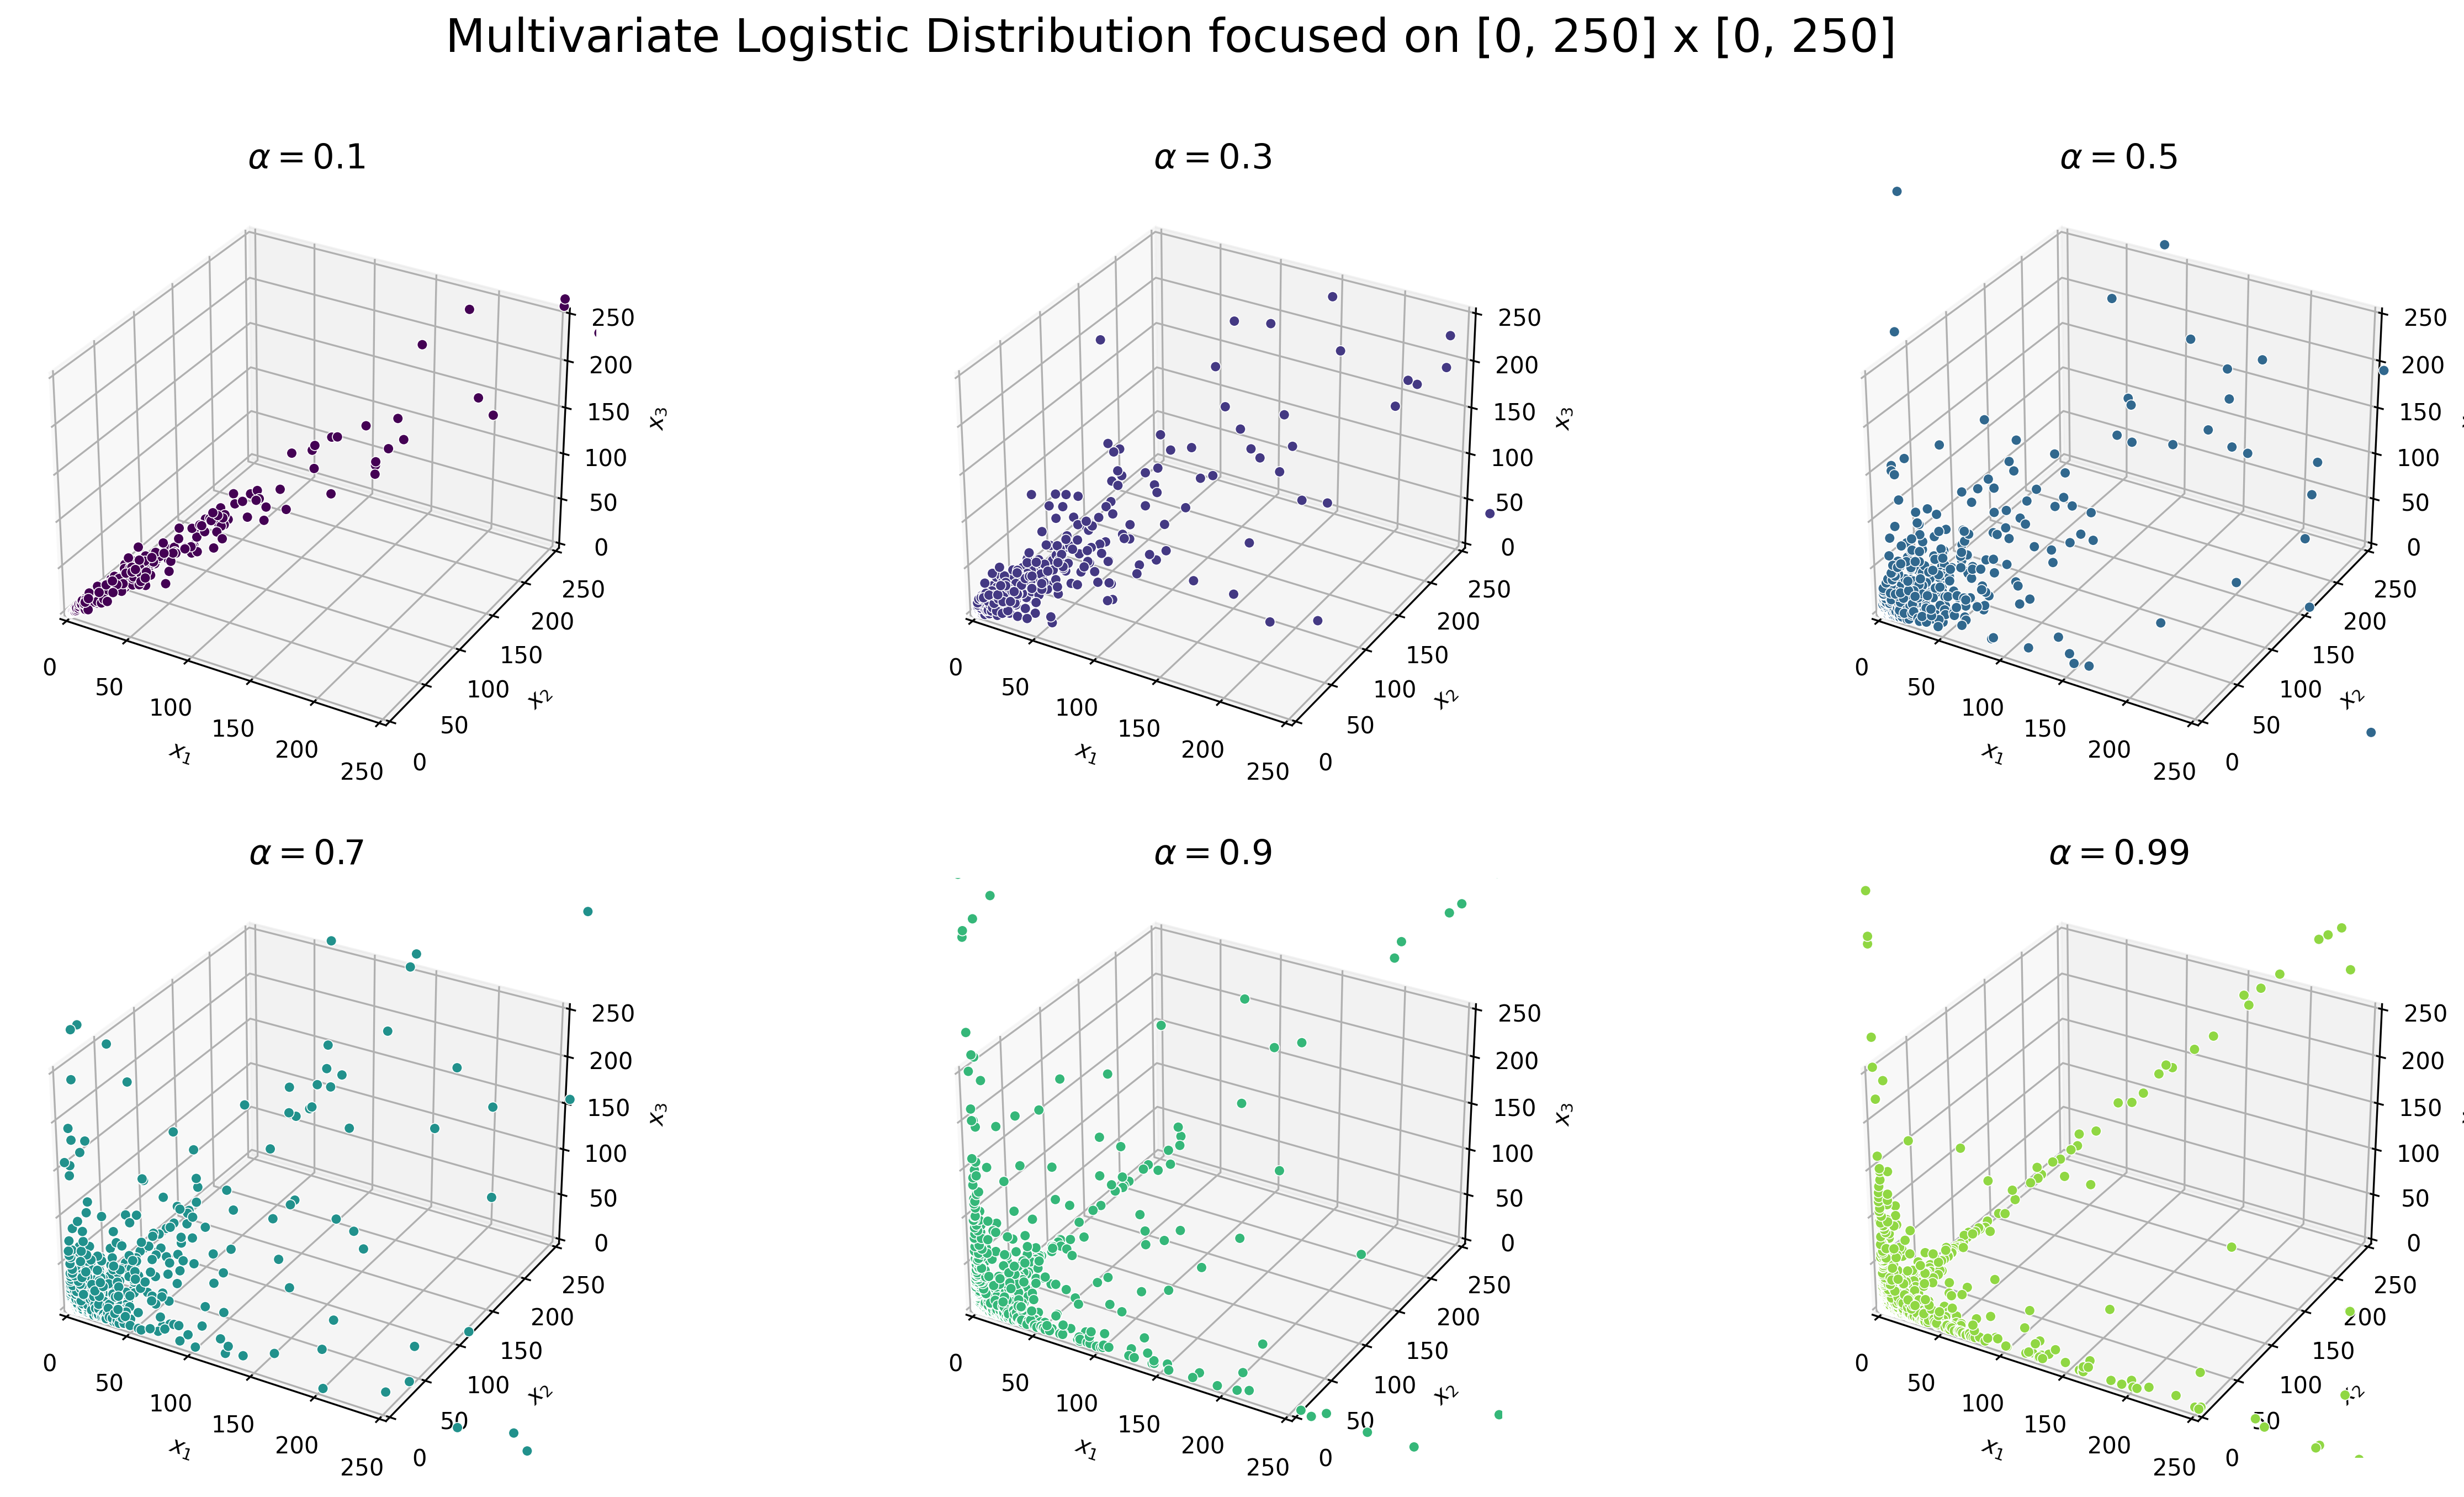

In [34]:
n_samples = 5000
dim = 3
alphas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]

plt.figure(figsize=(20, 10), dpi=300)
plt.suptitle("Multivariate Logistic Distribution focused on [0, 250] x [0, 250]", fontsize=20)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

colormap = plt.cm.viridis

for i, alpha in enumerate(alphas):
    ax = plt.subplot(2, 3, i + 1, projection='3d')
    ax.set_xlim([0, 250])
    ax.set_ylim([0, 250])
    ax.set_zlim([0, 250])


    samples = multivariate_logistic_distribution(n_samples, dim, alpha)

    ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], c=colormap(i / len(alphas)), alpha=1.0, edgecolors="white", linewidths=0.4)
    ax.set_title(f"$\\alpha = {alpha}$", fontsize=15)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$x_3$")


In [21]:
from extreme_classification.extreme_dataset import BivariateLogisticDataset

train_dataset = BivariateLogisticDataset(
    sizes=[5000, 5000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
)

test_dataset = BivariateLogisticDataset(
    sizes=[50000, 50000],
    alphas=[0.1, 0.5],
    labels=[0, 1],
)

c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:608: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = ax.scatter(scout_x, scout_y, **kws)
c:\Users\Antoine\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py:658: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(*args, **kws)


Text(0.5, 1.0, 'Sample from the train dataset in [0, 120] x [0, 120]')

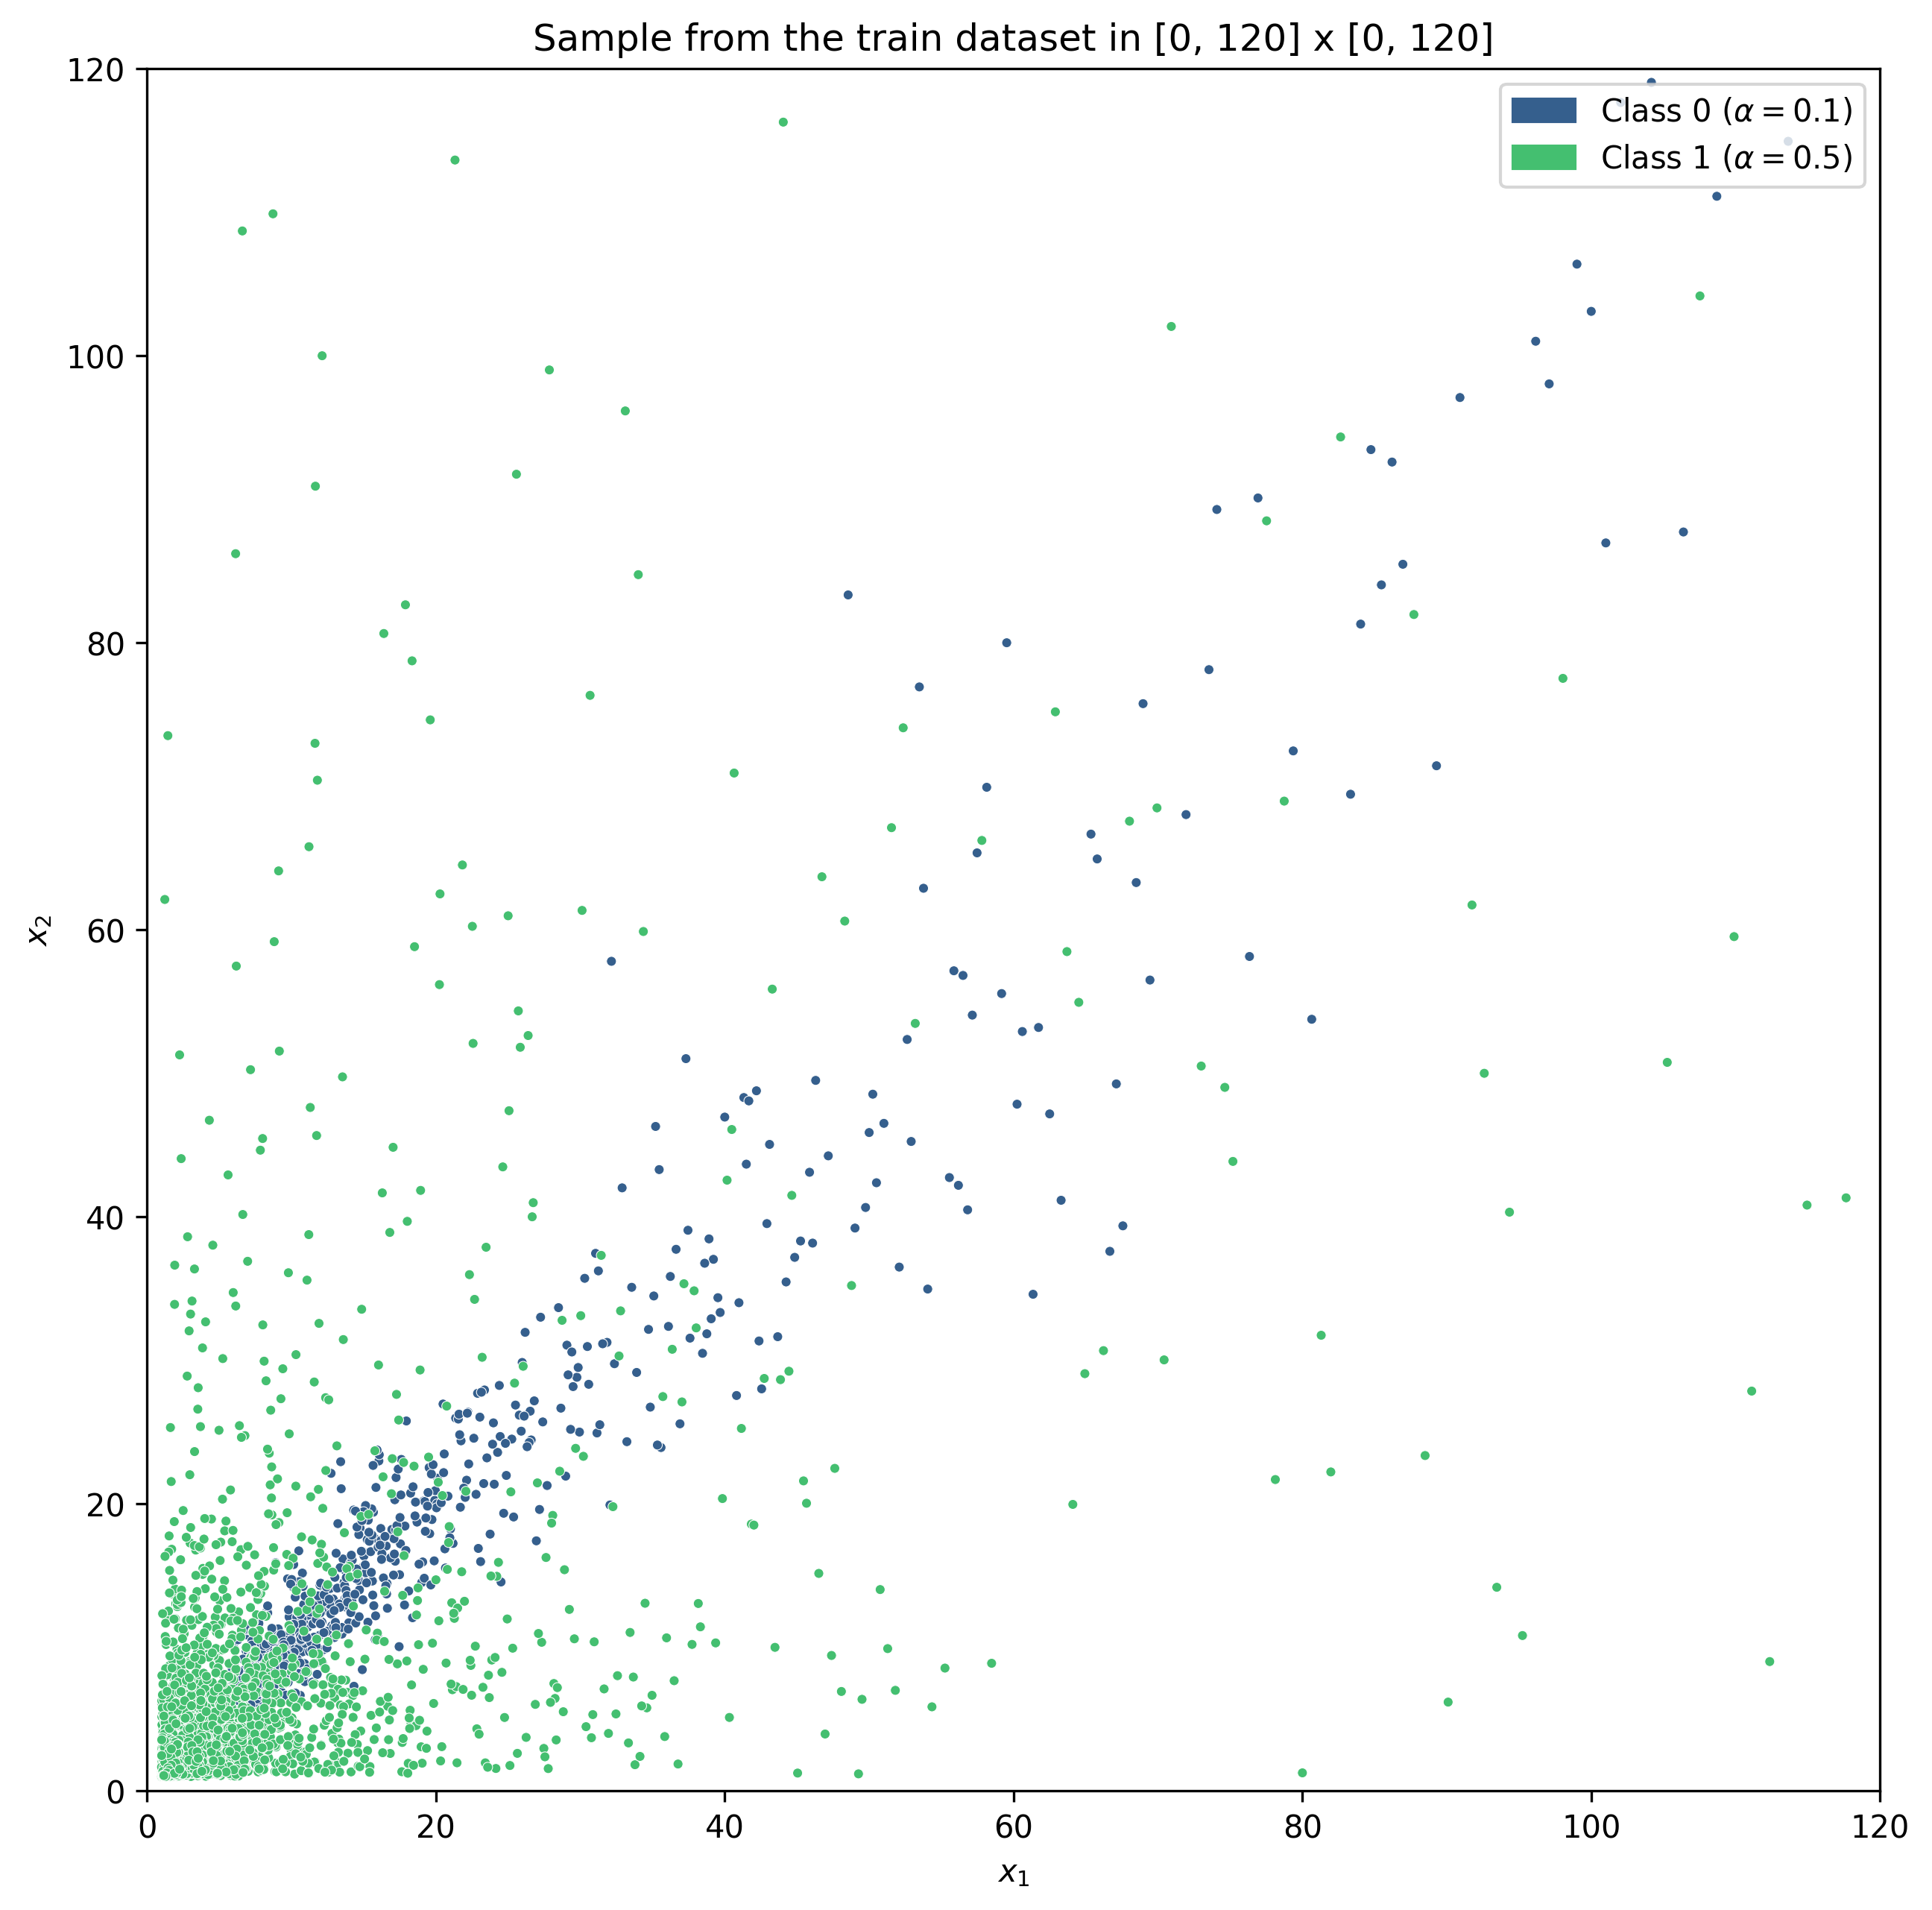

In [33]:
colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in train_dataset.labels]

plt.figure(figsize=(10, 10), dpi=300)
sns.scatterplot(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors, cmap=colormap, s=10)
plt.xlim(0, 120)
plt.ylim(0, 120)
# Add legend
import matplotlib.patches as mpatches
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
], loc='upper right')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')

In [37]:
k = 100
extreme_X, extreme_labels, boundary = train_dataset.get_extreme(k=k)

extreme_train_dataset = BivariateLogisticDataset.from_data(extreme_X, extreme_labels)


C:\Users\Antoine\AppData\Local\Temp\ipykernel_113008\3422540909.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors2, cmap=colormap, s=10, edgecolors="white", linewidths=0.4, alpha=1.0)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_113008\3422540909.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_train_dataset.X[:, 0], extreme_train_dataset.X[:, 1], c=colors1, cmap=colormap, s=10, edgecolors="white", linewidths=0.4, alpha=1.0)


Text(0.5, 1.0, 'Sample from the train dataset in [0, 120] x [0, 120]')

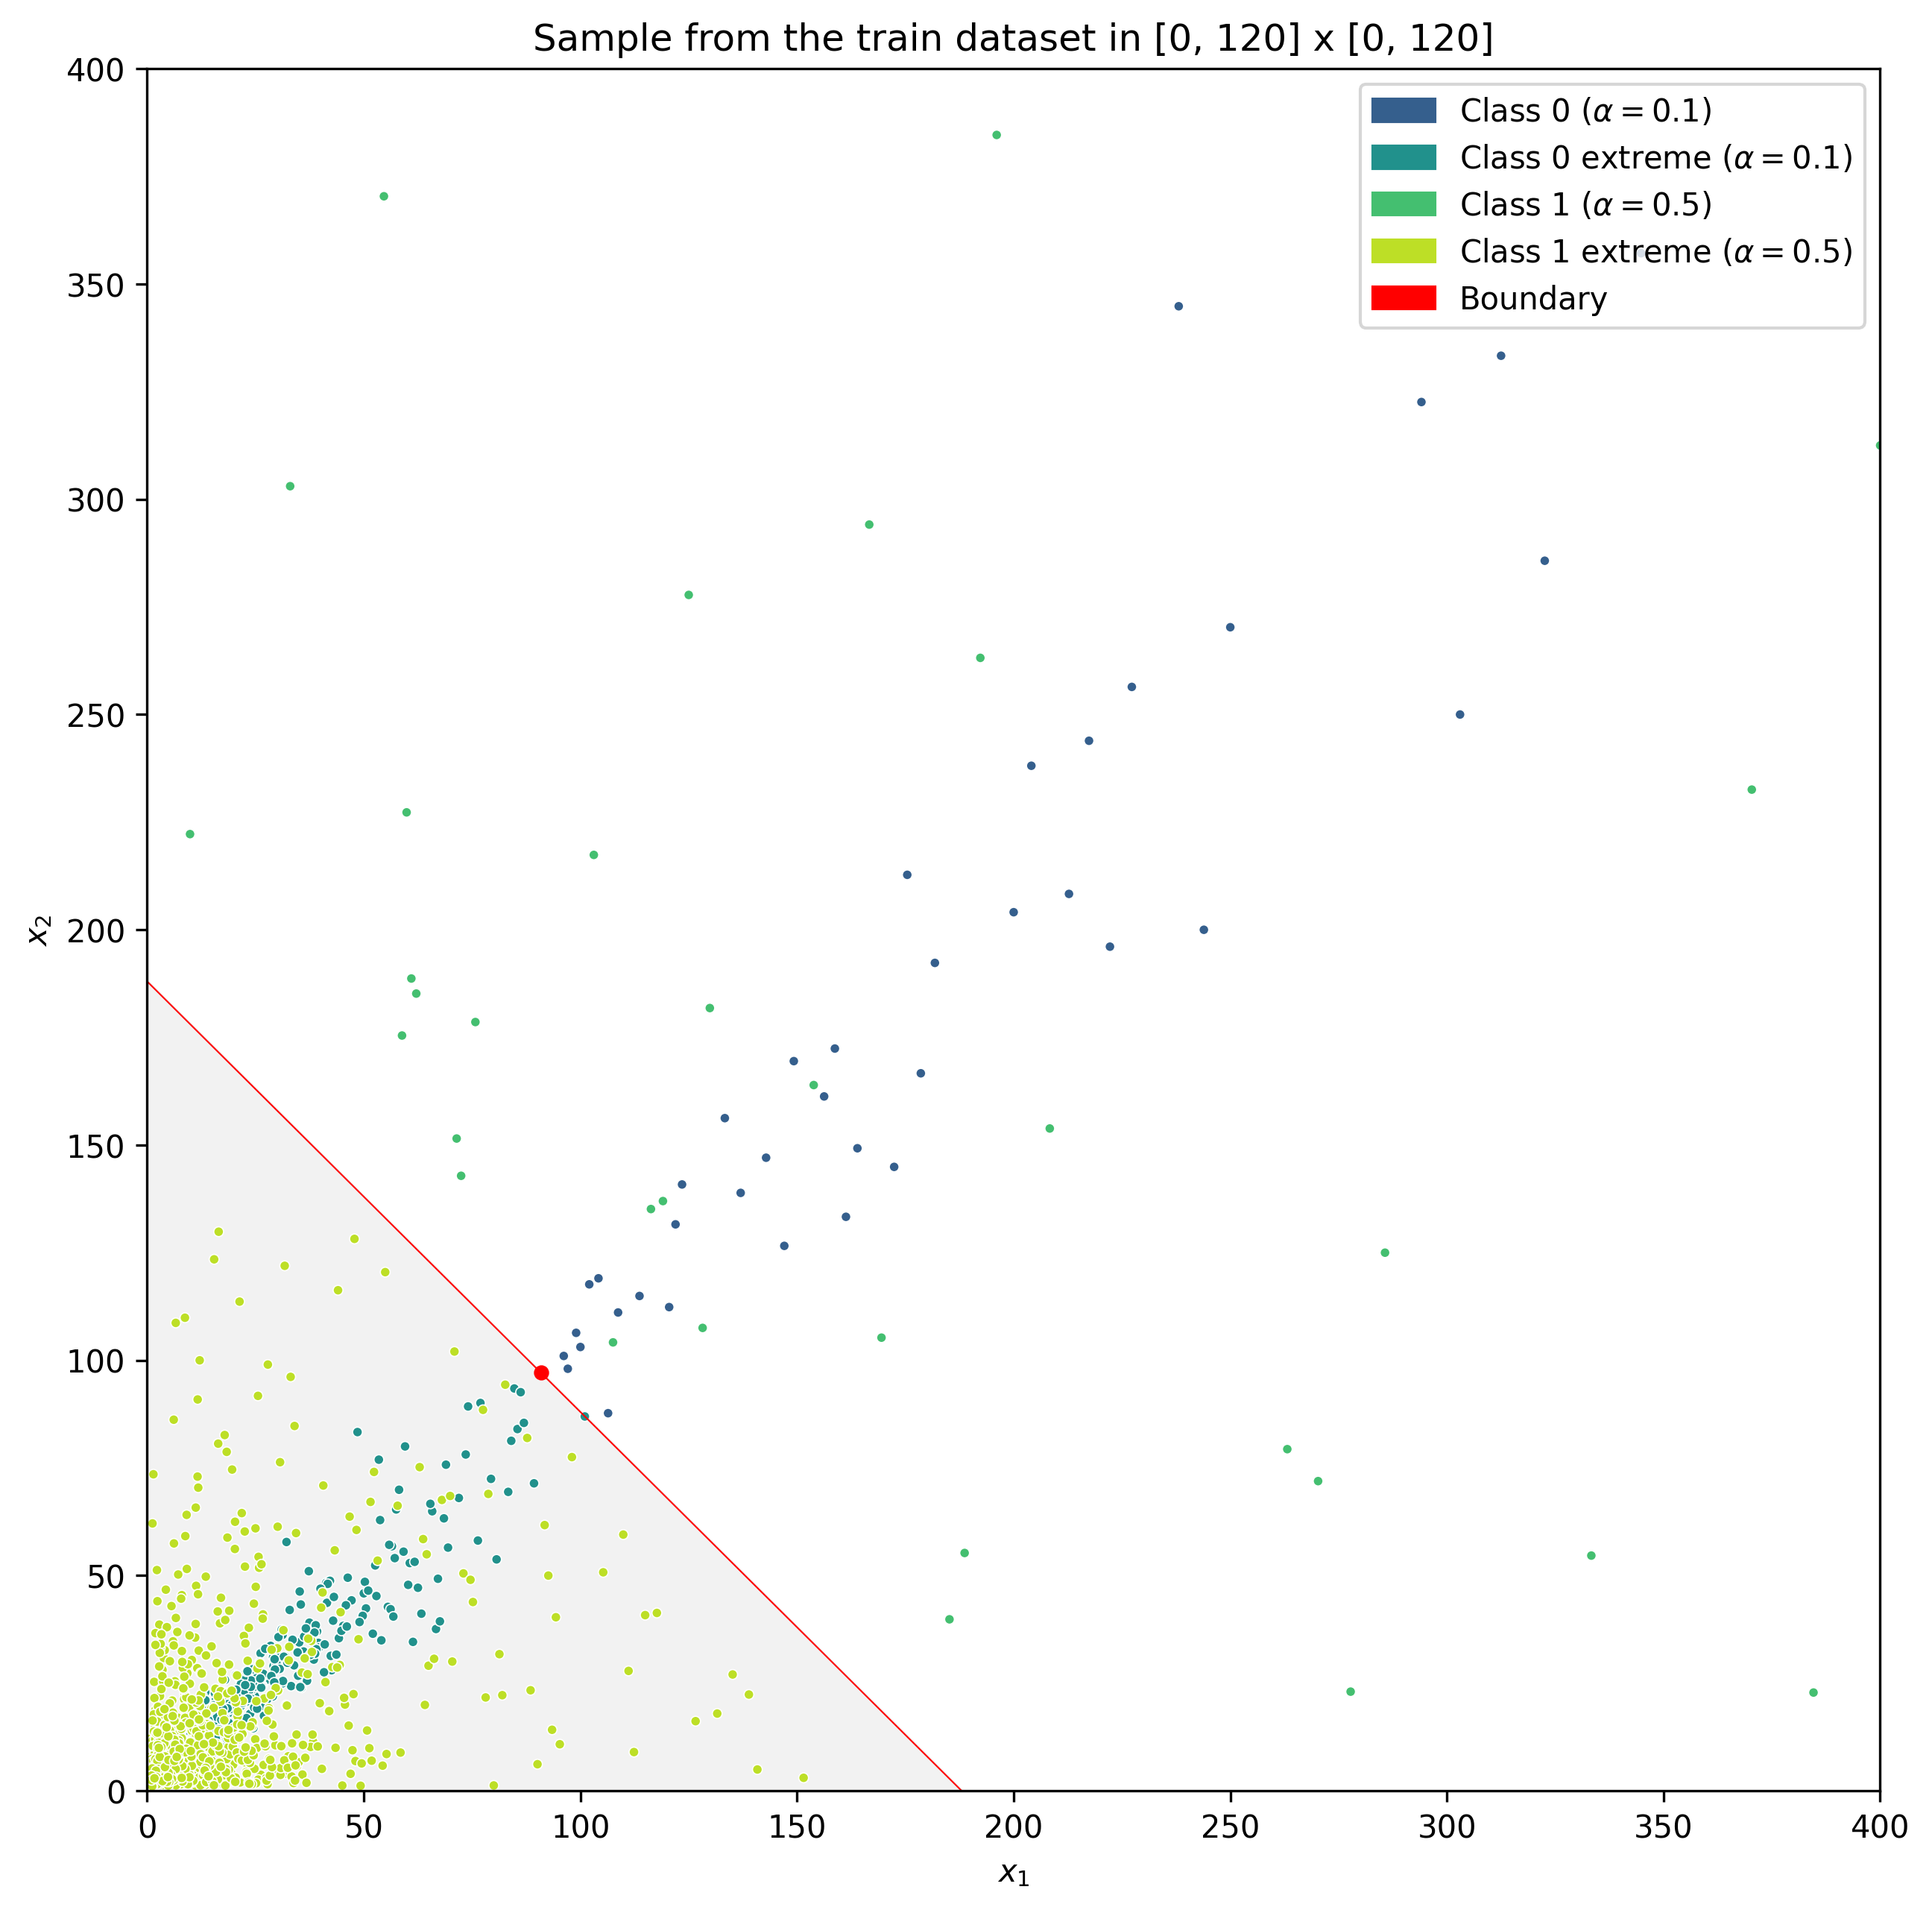

In [50]:
colors1 = [colormap(0.3) if label == 0 else colormap(0.7) for label in extreme_train_dataset.labels]
colors2 = [colormap(0.5) if label == 0 else colormap(0.9) for label in train_dataset.labels]

plt.figure(figsize=(10, 10), dpi=300)
plt.fill_between([0, boundary["norm"]], [boundary["norm"], 0], color="#f2f2f2")
plt.scatter(train_dataset.X[:, 0], train_dataset.X[:, 1], c=colors2, cmap=colormap, s=10, edgecolors="white", linewidths=0.4, alpha=1.0)
plt.scatter(extreme_train_dataset.X[:, 0], extreme_train_dataset.X[:, 1], c=colors1, cmap=colormap, s=10, edgecolors="white", linewidths=0.4, alpha=1.0)
plt.plot([0, boundary["norm"]], [boundary["norm"], 0], color="red", linewidth=0.5)
plt.scatter(boundary[0], boundary[1], color="red", s=15, marker="o")
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.5), label='Class 0 extreme ($\\alpha=0.1$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$)'),
    mpatches.Patch(color=colormap(0.9), label='Class 1 extreme ($\\alpha=0.5$)'),
    mpatches.Patch(color="red", label='Boundary'),
], loc='upper right')
# Add background color for only the extreme points
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Sample from the train dataset in [0, 120] x [0, 120]')

In [51]:
kappas = [0.5, 1, 1.5]

In [61]:
extreme_test_dataset = test_dataset.make_extreme(norm=boundary["norm"])
extreme_test_dataset_2, _ = extreme_test_dataset.get_extreme(k=0.5, as_dataset=True)
extreme_test_dataset_3, _ = extreme_test_dataset.get_extreme(k=0.3, as_dataset=True)

In [62]:
print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

print(f"Train extreme dataset size: {len(extreme_train_dataset)}")
print(f"Test extreme dataset size: {len(extreme_test_dataset)}")
print(f"Test extreme dataset 2 size: {len(extreme_test_dataset_2)}")
print(f"Test extreme dataset 3 size: {len(extreme_test_dataset_3)}")

Train dataset size: 10000
Test dataset size: 100000
Train extreme dataset size: 101
Test extreme dataset size: 1069
Test extreme dataset 2 size: 533
Test extreme dataset 3 size: 319


In [72]:
import numpy as np

C:\Users\Antoine\AppData\Local\Temp\ipykernel_113008\925028916.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_test_dataset.X[:, 0], extreme_test_dataset.X[:, 1], c=colors, cmap=colormap, s=10, edgecolors="white", linewidths=0.4, alpha=1.0, zorder=3)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_113008\925028916.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_test_dataset_2.X[:, 0], extreme_test_dataset_2.X[:, 1], c=colors2, cmap=colormap2, s=10, edgecolors="white", linewidths=0.4, alpha=1.0, zorder=4)
C:\Users\Antoine\AppData\Local\Temp\ipykernel_113008\925028916.py:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(extreme_test_dataset_3.X[:, 0], extreme_test_dataset_3.X[:, 1], c=colors3, cmap=colormap3, s=10, edgecolors="white", linewidths=0.4, alpha=1.0, zorder=5)


Text(0.5, 1.0, 'Sample from the test dataset in [0, 600] x [0, 600] for different $\\kappa$ values')

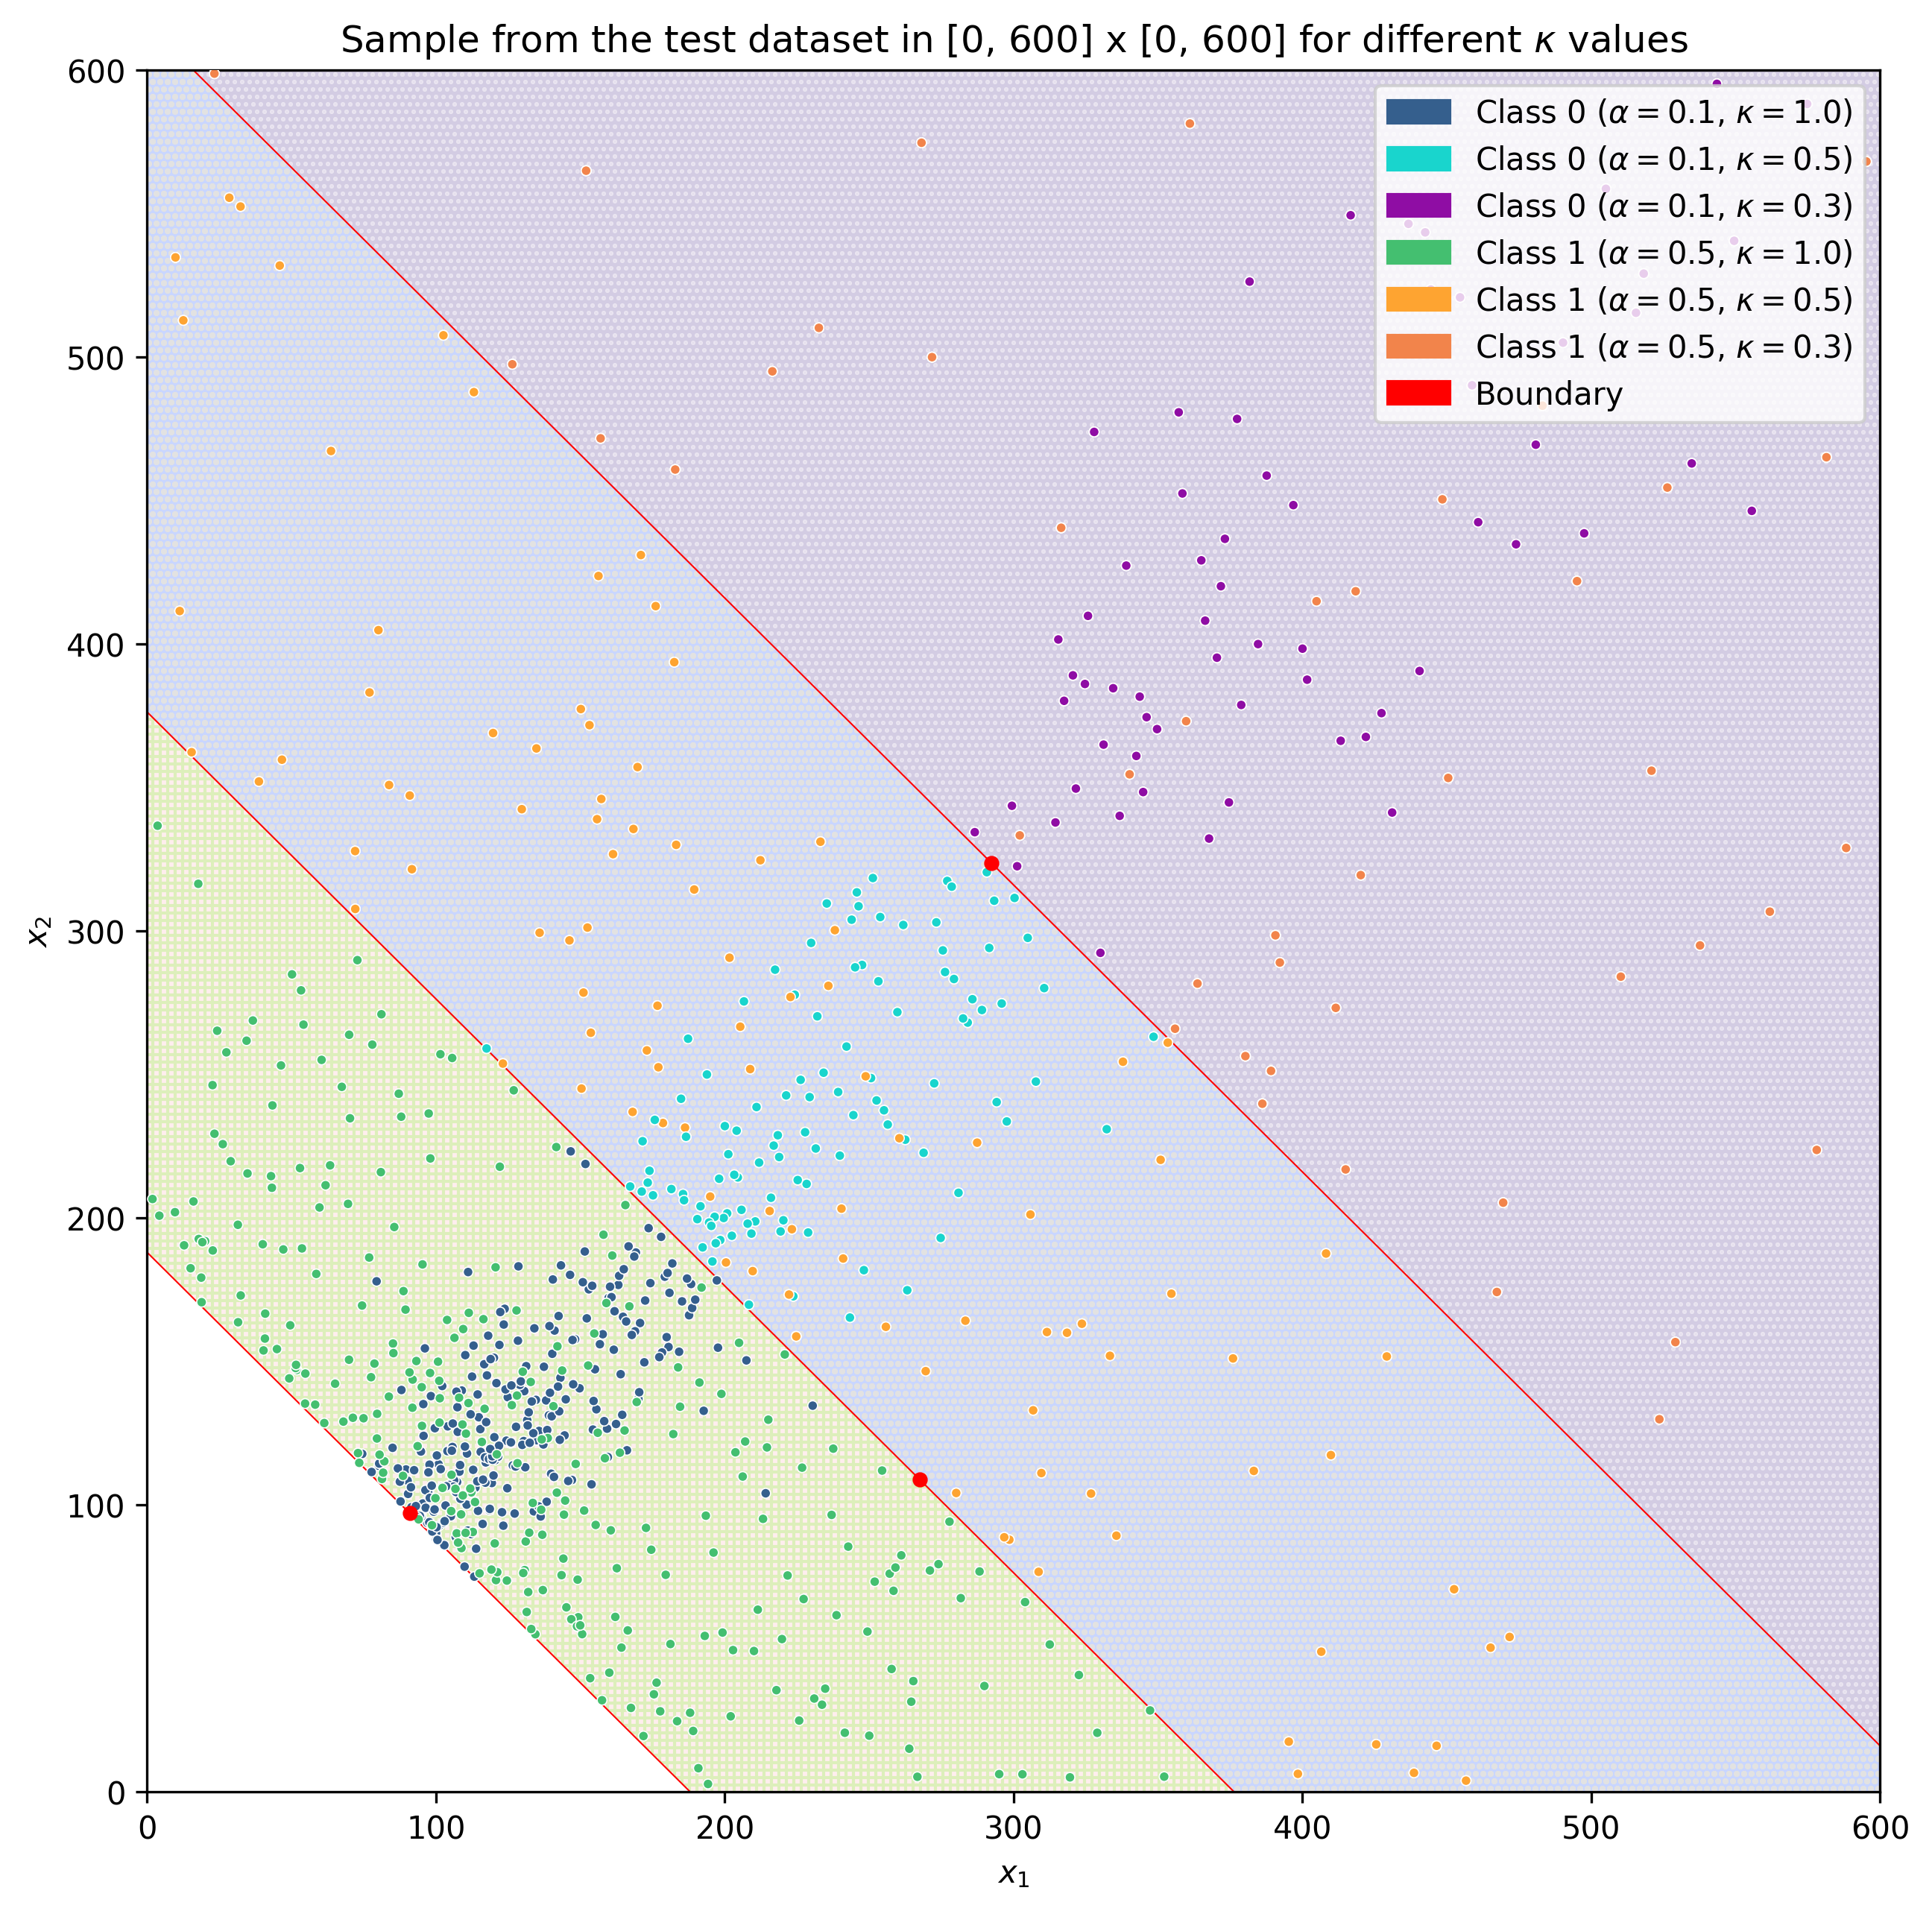

In [115]:
colormap2 = plt.cm.turbo
colormap3 = plt.cm.plasma


colors = [colormap(0.3) if label == 0 else colormap(0.7) for label in extreme_test_dataset.labels]
colors2 = [colormap2(0.3) if label == 0 else colormap2(0.7) for label in extreme_test_dataset_2.labels]
colors3 = [colormap3(0.3) if label == 0 else colormap3(0.7) for label in extreme_test_dataset_3.labels]


plt.figure(figsize=(10, 10), dpi=300)
xlim, ylim = 600, 600

bnorm = boundary["norm"]
bnorm2 = extreme_test_dataset_2.dataframe["norm"].min()
bnorm3 = extreme_test_dataset_3.dataframe["norm"].min()

boundary2 = extreme_test_dataset_2.dataframe[extreme_test_dataset_2.dataframe["norm"] == bnorm2].iloc[0]
boundary3 = extreme_test_dataset_3.dataframe[extreme_test_dataset_3.dataframe["norm"] == bnorm3].iloc[0]

hull = np.array([
    [0, bnorm],
    [bnorm, 0],
    [bnorm2, 0],
    [0, bnorm2],
    [0, bnorm],
])
hull2 = np.array([
    [0, bnorm2],
    [bnorm2, 0],
    [bnorm3, 0],
    [0, bnorm3],
    [0, bnorm2],
])
hull3 = np.array([
    [0, bnorm3],
    [bnorm3, 0],
    [xlim, ylim],
    [0, bnorm3],
])

plt.fill(hull[:, 0], hull[:, 1], color="#FFEEEE", hatch="+++++", edgecolor="#DDEFBB", linewidth=0.1)
plt.fill(hull2[:, 0], hull2[:, 1], color="#C9D6FF", hatch="ooooo", edgecolor="#E2E2E2", linewidth=0.1)
plt.fill(hull3[:, 0], hull3[:, 1], color="#D3CCE3", hatch=".....", edgecolor="#E9E4F0", linewidth=0.1)


plt.scatter(extreme_test_dataset.X[:, 0], extreme_test_dataset.X[:, 1], c=colors, cmap=colormap, s=10, edgecolors="white", linewidths=0.4, alpha=1.0, zorder=3)
plt.scatter(extreme_test_dataset_2.X[:, 0], extreme_test_dataset_2.X[:, 1], c=colors2, cmap=colormap2, s=10, edgecolors="white", linewidths=0.4, alpha=1.0, zorder=4)
plt.scatter(extreme_test_dataset_3.X[:, 0], extreme_test_dataset_3.X[:, 1], c=colors3, cmap=colormap3, s=10, edgecolors="white", linewidths=0.4, alpha=1.0, zorder=5)

plt.plot([0, bnorm], [bnorm, 0], color="red", linewidth=0.5)
plt.plot([0, bnorm2], [bnorm2, 0], color="red", linewidth=0.5)
plt.plot([0, bnorm3], [bnorm3, 0], color="red", linewidth=0.5)

plt.scatter(boundary[0], boundary[1], color="red", s=15, marker="o", zorder=6)
plt.scatter(boundary2[0], boundary2[1], color="red", s=15, marker="o", zorder=7)
plt.scatter(boundary3[0], boundary3[1], color="red", s=15, marker="o", zorder=8)


plt.legend(handles=[
    mpatches.Patch(color=colormap(0.3), label='Class 0 ($\\alpha=0.1$, $\\kappa=1.0$)'),
    mpatches.Patch(color=colormap2(0.3), label='Class 0 ($\\alpha=0.1$, $\\kappa=0.5$)'),
    mpatches.Patch(color=colormap3(0.3), label='Class 0 ($\\alpha=0.1$, $\\kappa=0.3$)'),
    mpatches.Patch(color=colormap(0.7), label='Class 1 ($\\alpha=0.5$, $\\kappa=1.0$)'),
    mpatches.Patch(color=colormap2(0.7), label='Class 1 ($\\alpha=0.5$, $\\kappa=0.5$)'),
    mpatches.Patch(color=colormap3(0.7), label='Class 1 ($\\alpha=0.5$, $\\kappa=0.3$)'),
    mpatches.Patch(color="red", label='Boundary'),
], loc='upper right')
plt.xlim(0, xlim)
plt.ylim(0, ylim)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Sample from the test dataset in [0, 600] x [0, 600] for different $\\kappa$ values')